到目前为止，已经探讨了不同机器学习的模型，但是它们各自的训练算法在很大程度上还是一个黑匣子。回顾前几章里的部分案例，在对系统内部一无所知的情况下，居然已经实现了这么多：优化了一个回归系统，改进了一个数字图片分类器，从零开始构建了一个垃圾邮件分类器——所有这些，都不知道它们实际是如何工作的。确实是这样，在许多情况下，并不需要了解实施细节。

但是，能很好地理解系统如何工作也是非常有帮助的。针对任务，它有助于快速定位到合适的模型、正确的训练算法，以及一套适当的超参数。不仅如此，后期还能更高效地执行错误调试和错误分析。最后还要强调一点，本章探讨的大部分主题对于理解、构建和训练神经网络是至关重要的。

本章我们将从最简单的模型之一——线性回归模型，开始介绍两种非常不同的训练模型的方法：

* 通过“闭式”方程——直接计算出最适合训练集的模型参数（也就是使训练集上的成本函数最小化的模型参数）。

* 使用迭代优化的方法，即梯度下降（GD），逐渐调整模型参数直至训练集上的成本函数调至最低，最终趋同于第一种方法计算出来的模型参数。还会研究几个梯度下降的变体，包括批量梯度下降、小批量梯度下降以及随机梯度下降。等进入到神经网络的学习时，会频繁地使用这几个变体。

接着将会进入多项式回归的讨论，这是一个更为复杂的模型，更适合非线性数据集。由于该模型的参数比线性模型更多，因此更容易造成对训练数据过度拟合，使用学习曲线来分辨这种情况是否发生。然后，再介绍几种正则化技巧，降低过度拟合训练数据的风险。

最后，学习两种经常用于分类任务的模型：`Logistic`回归和`Softmax`回归。

> 本章将会出现不少数学公式，需要用到线性代数和微积分的一些基本概念。要理解这些方程式，需要知道什么是向量和矩阵，如何转置向量和矩阵，什么是点积，什么是逆矩阵，什么是偏导数。如果不熟悉这些概念，请先通过在线补充材料中的Jupyter笔记本，进行线性代数和微积分的入门学习。对那些真的极度讨厌数学的人，还是需要学习这一章，但是可以跳过那些数学公式，希望文字足以让你了解大多数的概念。

In [2]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

## 线性回归

在第1章中，学过一个简单的生活满意度的回归模型：$life\_satisfaction＝0+1 \times GDP\_per\_capita。$

这个模型就是输入特征GDP_per_capita的线性函数，0和1是模型的参数。

更为概括地说，线性模型就是对输入特征加权求和，再加上一个我们称为偏置项（也称为截距项）的常数，以此进行预测，如下式所示。

$$
\hat y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + + \theta_nx_n \tag{4-1} \label{4-1}
$$


* $\hat y$是预测值

* $n$是特征的数量

* $x_i$ 是第i个特征值

* $\theta_j$ 是第j个模型参数（包括偏置项$\theta_0$以及特征权重$\theta_1, \theta_2, \dots, \theta_n$ ）

这可以用更为简洁的向量化形式表达，如下公式所示。

$$
\hat y = h_\theta(X) = \theta^T \cdot X  \tag{4-2}  \label{4-2}
$$

* $\theta$是模型的参数向量，包括偏置项$\theta_0$以及特征权重$\theta_1$到$\theta_n$

* $\theta^T$是$\theta$的转置向量（为行向量，而不再是列向量）

* $X$是实例的特征向量，包括从$x_0$到$x_n$，$x 0$永远为1

* $\theta^T \cdot X$是$\theta^T$和$X$的点积

* $h_\theta$ 是使用模型参数$\theta$的假设函数

该怎样训练线性回归模型呢？回想一下，训练模型就是设置模型参数直到模型最适应训练集的过程。要达到这个目的，首先需要知道怎么衡量模型对训练数据的拟合程度是好还是差。在第2章中，了解到回归模型最常见的性能指标是均方根误差（RMSE）。因此，在训练线性回归模型时，需要找到最小化RMSE的$\theta$值。在实践中，将均方误差（MSE）最小化比最小化RMSE更为简单，二者效果相同（因为使函数最小化的值，同样也使其平方根最小）。 [1]

在训练集$X$上，使用公式4-3计算线性回归的MSE，h θ 为假设函数。

$$
MSE(X, h_\theta) = \frac{1}{m} \sum_{i=1}^m(\theta^T \cdot X^{(i)}) \tag{4-3} \label{4-3}
$$

这些符号大多数在第2章中提到过唯一的区别是$h$换成了$h_\theta$ ，以便清楚地表明模型被向量$\theta$参数化。为了简化符号，将$MSE(X, h_\theta) $直接写作$MSE(\theta)$。

### 标准方程

为了得到使成本函数最小的θ值，有一个闭式解方法——也就是一个直接得出结果的数学方程，即标准方程（公式4-4）。 [2]

$$
\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y \tag{4-4} \label{4-4}
$$

* $\hat \theta$是使成本函数最小的θ值。

* $y$是包含$y^{(1)}$到$y^{(m)}$的目标值向量。

生成一些线性数据来测试这个公式：

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

现在使用标准方程来计算 。使用NumPy的线性代数模块（`np.linalg`）中的`inv()`函数来对矩阵求逆，并用`dot()`方法计算矩阵的内积：

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

实际用来生成数据的函数是$y＝4+3x_0 +高斯噪声$。来看看公式的结果：

In [5]:
theta_best

array([[3.66044988],
       [3.05423813]])

期待的是$θ_0 = 4$，$θ_1 ＝3$得到的是$θ_0 = 3.888$，$θ_1 = 3.075$。非常接近，噪声的存在使其不可能完全还原为原本的函数。

现在可以用 做出预测：

In [6]:
X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)

y_predict

array([[3.66044988],
       [9.76892615]])

绘制模型的预测结果（见图4-2）：

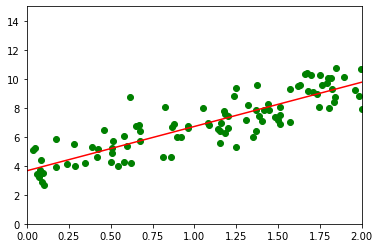

In [7]:
plt.plot(X_new, y_predict, "r-")
#plt.plot(X, y, "b.")
plt.scatter(X, y, c='g')
plt.axis([0, 2, 0, 15])
plt.show()

Scikit-Learn的等效代码如下所示： [3]
> 结果完全一致

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.66044988]), array([[3.05423813]]))

In [9]:
lin_reg.predict(X_new)

array([[3.66044988],
       [9.76892615]])

### 计算复杂度

标准方程求逆的矩阵$X^T \cdot X$，是一个$n \times n$矩阵（n是特征数量）。对这种矩阵求逆的计算复杂度通常为$O(n^{2.4})$到$O(n^3)$之间（取决于计算实现）。换句话说，如果将特征数量翻倍，那么计算时间将乘以大约$2^{2.4} = 5.3$倍到$2^3 ＝8$倍之间。

> 特征数量比较大（例如100000）时，标准方程的计算将极其缓慢。

好的一面是，相对于训练集中的实例数量（$O(m)$）来说，方程是线性的，所以能够有效地处理大量的训练集，只要内存足够。

同样，线性回归模型一经训练（不论是标准方程还是其他算法），预测就非常快速：因为计算复杂度相对于想要预测的实例数量和特征数量来说，都是线性的。换句话说，对两倍的实例（或者是两倍的特征数）进行预测，大概需要两倍的时间。

现在，再看几个截然不同的线性回归模型的训练方法，这些方法更适合特征数或者训练实例数量大到内存无法满足要求的场景。

> [1] 通常情况下，学习算法优化的函数都与评估最终模型时使用的性能指标函数不同。这可能是因为前者更容易计算，也可能是因为前者具有某些后者所缺乏的差异属性，还可能是因为想在训练期间约束模型，后面讨论正则化时将会看到。

> [2] 这个方程返回的$\theta$值能够最小化成本函数，此证明过程不在讨论范围之内。

> [3] 注意，Scikit-Learn将偏置项（intercept_）和特征权重（coef_）分离开了。

## 梯度下降

梯度下降是一种非常通用的优化算法，能够为大范围的问题找到最优解。梯度下降的中心思想就是迭代地调整参数从而使成本函数最小化。

梯度下降的做法：通过测量参数向量$\theta$相关的误差函数的局部梯度，并不断沿着降低梯度的方向调整，直到梯度降为$0$，到达最小值！

具体来说，首先使用一个随机的$\theta$值（这被称为随机初始化），然后逐步改进，每次踏出一步，每一步都尝试降低一点成本函数（如MSE），直到算法收敛出一个最小值。

![梯度下降](images/VNote/20200721173011380_16498.png)

梯度下降中一个重要参数是每一步的`步长`，这取决于超参数`学习率`。如果学习率太低，算法需要经过大量迭代才能收敛，这将耗费很长时间。

![学习率太低](images/VNote/20200721174439537_5809.png)

反过来说，如果学习率太高，那可能会越过山谷直接到达山的另一边，甚至有可能比之前的起点还要高。这会导致算法发散，值越来越大，最后无法找到好的解决方案。

![学习率太高](images/VNote/20200721174513130_2517.png)

最后，并不是所有的成本函数看起来都像一个漂亮的碗。有的可能看着像洞、像山脉、像高原或者是各种不规则的地形，导致很难收敛到最小值。下图显示了梯度下降的两个主要挑战：如果随机初始化，算法从左侧起步，那么会收敛到一个局部最小值，而不是全局最小值。如果算法从右侧起步，那么需要经过很长时间才能越过整片高原，如果停下得太早，将永远达不到全局最小值。

![梯度下降陷阱](images/VNote/20200721174612576_7478.png)

幸好，线性回归模型的MSE成本函数恰好是个凸函数，这意味着连接曲线上任意两个点的线段永远不会跟曲线相交。也就是说不存在局部最小，只有一个全局最小值。它同时也是一个连续函数，所以斜率不会产生陡峭的变化。 [1] 这两件事保证的结论是：即便是乱走，梯度下降都可以趋近到全局最小值（只要等待时间足够长，学习率也不是太高）。

成本函数虽然是碗状的，但如果不同特征的尺寸差别巨大，那它可能是一个非常细长的碗。如下图所示的梯度下降，左边的训练集上特征1和特征2具有相同的数值规模，而右边的训练集上，特征1的值则比特征2要小得多。（注：因为特征1的值较小，所以$θ_1$需要更大的变化来影响成本函数，这就是为什么碗形会沿着$θ_1$轴拉长。）

![特征值缩放和特征值无缩放的梯度下降](images/VNote/20200721182339599_29018.png)


左图的梯度下降算法直接走向最小值，可以快速到达。而在右图中，先是沿着与全局最小值方向近乎垂直的方向前进，接下来是一段几乎平坦的长长的山谷。最终还是会抵达最小值，但是这需要花费大量的时间。

> 应用梯度下降时，需要保证所有特征值的大小比例都差不多（比如使用Scikit-Learn的`StandardScaler`类），否则收敛的时间会长很多。

这张图也说明，训练模型也就是搜寻使成本函数（在训练集上）最小化的参数组合。这是模型参数空间层面上的搜索：模型的参数越多，这个空间的维度就越多，搜索就越难。同样是在干草堆里寻找一根针，在一个三百维的空间里就比在一个三维空间里要棘手得多。幸运的是，线性回归模型的成本函数是凸函数，针就躺在碗底。

### 批量梯度下降

要实现梯度下降，需要计算每个模型关于参数$\theta_j$ 的成本函数的梯度。换言之，需要计算的是如果改变$\theta_j$ ，成本函数会改变多少。这被称为`偏导数`。公式4-5计算了关于参数$\theta_j$ 的成本函数的偏导数，计作$\frac{\partial}{\partial \theta_j}MSE(\theta)$。

$$
\frac{\partial}{\partial \theta_j}MSE(\theta) = \frac{2}{m} \sum_{i=1}^m(\theta^T \cdot x^{(i)}-y^{(i)})x_j^{(i)} \tag{4-5} \label{(4-5)}
$$

如果不想单独计算这些梯度，可以使用公式4-6对其进行一次性计算。梯度向量，记作 ，包含所有成本函数（每个模型参数一个）的偏导数。

$$
\nabla_\theta MSE(\theta) = 
\begin{pmatrix}
    \frac{\partial}{\partial \theta_0}MSE(\theta)\\
    \frac{\partial}{\partial \theta_1}MSE(\theta)\\
    \vdots                                       \\
    \frac{\partial}{\partial \theta_n}MSE(\theta)\\
\end{pmatrix}
=\frac{2}{m}X^T \cdot (X \cdot \theta - y) \tag{4-6}
$$

> 公式4-6在计算梯度下降的每一步时，都是基于完整的训练集$X$的。这就是为什么该算法会被称为批量梯度下降：每一步都使用整批训练数据。因此，面对非常庞大的训练集时，算法会变得极慢。但是，梯度下降算法随特征数量扩展的表现比较好：如果要训练的线性模型拥有几十万个特征，使用梯度下降比标准方程要快得多。

一旦有了梯度向量，哪个点向上，就朝反方向下坡。也就是从$\theta$中减去$\nabla_\theta MSE(\theta)$。这时学习率$\eta$就发挥作用了： [2] 用梯度向量乘以$\eta$确定下坡步长的大小（公式4-7）。

$$
\theta^{(next \_ step)} = \theta - \eta \nabla_\theta MSE(\theta) \tag{4-7}
$$

来看看这个算法的快速实现：

In [25]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

也不是太难！看看产生的结果theta：

In [26]:
theta

array([[3.66044988],
       [3.05423813]])

In [27]:
# 预测结果
X_new_b.dot(theta)

array([[3.66044988],
       [9.76892615]])

嘿，这不正是标准方程的发现么！梯度下降表现完美。如果使用了其他的学习率$\eta$呢？下图展现了分别使用三种不同的学习率时，梯度下降的前十步（虚线表示起点）。

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

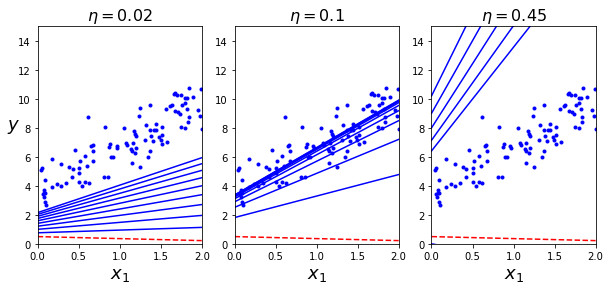

In [20]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.45)

# save_fig("gradient_descent_plot")
plt.show()

左图的学习率太低：算法最终还是能找到解决方法，就是需要太长时间。中间的学习率看起来非常棒：几次迭代就收敛出了最终解。而右边的学习率太高：算法发散，直接跳过了数据区域，并且每一步都离实际解决方案越来越远。

要找到合适的学习率，可以使用网格搜索。但是可能需要**限制迭代次数**，这样网格搜索可以淘汰掉那些收敛耗时太长的模型。

怎么限制迭代次数呢？如果设置太低，算法可能在离最优解还很远时就停了；但是如果设置得太高，模型达到最优解后，继续迭代参数不再变化，又会浪费时间。一个简单的办法是，**在开始时设置一个非常大的迭代次数，但是当梯度向量的值变得很微小时中断算法**——也就是当它的范数变得低于（称为容差）时，因为这时梯度下降已经（几乎）到达了最小值。

> 收敛率

> 成本函数为凸函数，并且斜率没有陡峭的变化时（如$MSE$成本函数），通过批量梯度下降可以看出一个固定的学习率有一个收敛率，为$O(\frac{1}{inter})$。换句话说，如果将容差$\epsilon$缩小为原来的1/10（以得到更精确的解），算法将不得不运行10倍的迭代次数。

### 随机梯度下降

批量梯度下降的主要问题是它要用整个训练集来计算每一步的梯度，所以训练集很大时，算法会特别慢。与之相反的极端是随机梯度下降，每一步在训练集中随机选择一个实例，并且仅基于该单个实例来计算梯度。显然，这让算法变得快多了，因为每个迭代都只需要操作少量的数据。它也可以被用来训练海量的数据集，因为每次迭代只需要在内存中运行一个实例即可（SGD可以作为核外算法实现 [3] ）。

另一方面，由于算法的随机性质，它比批量梯度下降要不规则得多。成本函数将不再是缓缓降低直到抵达最小值，而是不断上上下下，但是从整体来看，还是在慢慢下降。随着时间推移，最终会非常接近最小值，但是即使它到达了最小值，依旧还会持续反弹，永远不会停止。所以算法停下来的参数值肯定是足够好的，但不是最优的。

![随机梯度下降](images/VNote/20200727150722798_9601.png)


> 当成本函数非常不规则时，随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。

因此，随机性的好处在于可以逃离局部最优，但缺点是永远定位不出最小值。要解决这个困境，有一个办法是逐步降低学习率。开始的步长比较大（这有助于快速进展和逃离局部最小值），然后越来越小，让算法尽量靠近全局最小值。这个过程叫作`模拟退火`，因为它类似于冶金时熔化的金属慢慢冷却的退火过程。确定每个迭代学习率的函数叫作学习计划。如果学习率降得太快，可能会陷入局部最小值，甚至是停留在走向最小值的半途中。如果学习率降得太慢，需要太长时间才能跳到差不多最小值附近，如果提早结束训练，可能只得到一个次优的解决方案。

下面这段代码使用了一个简单的学习计划实现随机梯度下降：

In [42]:
theta_path_sgd = []
# 样本数量
m = len(X_b)
np.random.seed(42)

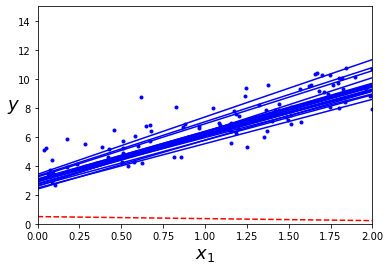

In [43]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            # 红色线条为随机的起点
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
# save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

按照惯例，用m来表示迭代次数，每一次迭代称为一轮。前面的批量梯度下降需要在整个训练集上迭代1000次，而这段代码只迭代了50次就得到了一个相当不错的解：

In [22]:
theta

array([[3.67781204],
       [3.04310401]])

因为实例是随机挑选，所以在同一轮里某些实例可能被挑选多次，而有些实例则完全没被选到。如果希望每一轮算法都能遍历每个实例，有一种办法是将训练集洗牌打乱，然后一个接一个的使用实例，用完再重新洗牌，以此继续。不过这种方法通常收敛得更慢。

在Scikit-Learn里，用SGD执行线性回归可以使用SGDRegressor类，其默认优化的成本函数是平方误差。下面这段代码从学习率0.1开始（eta0=0.1），使用默认的学习计划（跟前面的学习计划不同）运行了50轮，而且没有使用任何正则化（penalty=None，后面即将介绍更多与此相关的细节）：

In [49]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)

sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

再次得到了一个跟标准方程的解非常相近的解决方案：

In [50]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.6224475]), array([3.04058479]))

### 小批量梯度下降

最后一个梯度下降算法叫作小批量梯度下降。一旦理解了批量梯度下降和随机梯度下降，这个算法就非常容易理解了：每一步的梯度计算，既不是基于整个训练集（如批量梯度下降）也不是基于单个实例（如随机梯度下降），而是基于一小部分随机的实例集也就是小批量。相比随机梯度下降，小批量梯度下降的**主要优势**在于可以从矩阵运算的硬件优化中获得显著的性能提升，特别是需要用到图形处理器时。

这个算法在参数空间层面的前进过程也不像SGD那样不稳定，特别是批量较大时。所以小批量梯度下降最终会比SGD更接近最小值一些。但是另一方面，它可能更难从局部最小值中逃脱。图4-11显示了三种梯度下降算法在训练过程中参数空间里的行进路线。它们最终都汇聚在最小值附近，批量梯度下降最终停在了最小值上，而随机梯度下降和小批量梯度下降还在继续游走。但是，别忘了批量梯度可是花费了大量时间来计算每一步的，如果用好了学习计划，随机梯度下降和小批量梯度下降也同样能到达最小值。

In [56]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [57]:
theta

array([[3.70353566],
       [3.1109011 ]])

In [58]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

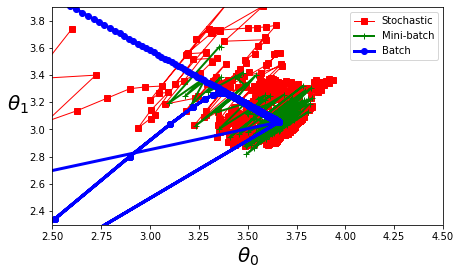

In [59]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
# plt.legend(loc="upper left", fontsize=16)
plt.legend()
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
# save_fig("gradient_descent_paths_plot")
plt.show()

最后，来比较一下到目前为止所讨论过的线性回归算法 [4] （m是训练实例的数量，n是特征数量），见下表。

| 算法 | 很大的m | 支持核外 | 很大的n | 超参数 | 是否需要缩放 | sklearn |
| --- | ------ | ------- | ------ | ----- | ----------- | ------- |
| 标准方程 | 快 | 否 | 慢 | 0 | 否 | LinearRegression |
| 批量梯度下降 | 慢 | 否 | 快 | 2 | 是 | NA |
| 随机梯度下降 | 快 | 是 | 快 | $\ge 2$ | 是 | SGDRegressor |
| 小批量梯度下降 | 快 | 是 | 快 | $\ge 2$ | 是 | NA |

 训练后的模型几乎无差别：所有这些算法最后出来的模型都非常相似，并且以完全相同的方式做出预测。

> [1] 从技术上讲，其导数满足利普希茨连续（Lipschitz Continuous）。
> [2] Eta（$\eta$）是第7个希腊字母。
> [3] 见第1章中对核外算法的讨论。
> [4] 标准方程仅能用于线性回归，但是梯度下降算法还可以用于训练许多其他模型。

## 多项式回归

如果数据比简单的直线更为复杂，该怎么办？令人意想不到的是，其实你也可以用线性模型来拟合非线性数据。一个简单的方法就是将每个特征的幂次方添加为一个新特征，然后在这个拓展过的特征集上训练线性模型。这种方法被称为`多项式回归`。

看下面这个例子，首先，基于简单的二次方程（注：二次方程的形式为$y = ax^2 + bx +c$）制造一些非线性数据（添加随机噪声，见图4-12）：

In [64]:
m = 100

X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

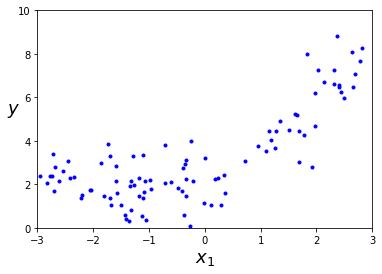

In [65]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
# save_fig("quadratic_data_plot")
plt.show()

显然，直线永远不可能拟合这个数据。所以使用Scikit-Learn的`PolynomialFeatures`类来对训练数据进行转换，将每个特征的平方（二次多项式）作为新特征加入训练集（这个例子中只有一个特征）：

In [66]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.08811808])

In [67]:
X_poly[0]

array([1.08811808, 1.18400095])

X_poly现在包含原本的特征X和该特征的平方。现在对这个扩展后的训练集匹配一个LinearRegression模型（见图4-13）：

In [70]:
lin_reg = LinearRegression()

lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.16320193]), array([[0.95366342, 0.41611975]]))

还不错！模型预估$y =0.42x^2 +0.93x +2.16$，而实际上原本的函数是$y=0.5 x^2 +1.0x 1 +2.0+ noise$。

> 当存在多个特征时，多项式回归能够发现特征和特征之间的关系（纯线性回归模型做不到这一点）。这是因为PolynomialFeatures会在给定的多项式阶数下，添加所有特征组合。例如，有两个特征a和b，阶数degree=3，`PolynomialFeatures`不只会添加特征$a^2 、a^3 、b^2 和b^3$，还会添加组合$ab、a^2 b以及ab^2$。

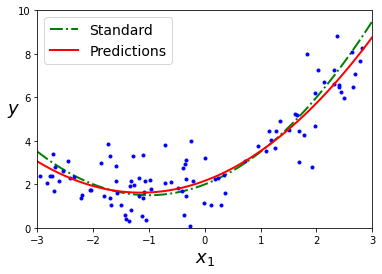

In [82]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
y_new_std = 0.5 * X_new**2 + X_new + 2
plt.plot(X_new, y_new_std, 'g-.',linewidth=2, label='Standard')
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
# ave_fig("quadratic_predictions_plot")
plt.show()

> `PolynomialFeatures`（degree=d）可以将一个包含n个特征的数组转换为包含$\frac{n+d}{d!n!}$个特征的数组，其中$n!$是n的阶乘，等于$1×2×3× \dots ×n$。要小心特征组合的数量爆炸。

## 学习曲线

高阶多项式回归对训练数据的拟合，很可能会比简单线性回归要好。例如，图4-14使用了一个300阶多项式模型来处理训练数据，并将结果与一个纯线性模型和一个二次模型（二阶多项式）进行对比。注意看这个300阶模型是如何波动以使其尽可能贴近训练实例的。

当然，这个高阶多项式回归模型严重地过度拟合了训练数据，而线性模型则是拟合不足。这个案例中泛化结果最好的是二次模型。这很合理，因为数据本身是用二次模型生成的。但是一般来说，你不会知道生成数据的函数是什么，那么该如何确定模型的复杂程度呢？怎么才能判断模型是过度拟合还是拟合不足呢？

在第2章中，我们使用了交叉验证来评估模型的泛化性能。如果模型在训练集上表现良好，但是交叉验证的泛化表现非常糟糕，那么模型就是过度拟合。如果在二者上的表现都不佳，那就是拟合不足。这是判断模型太简单还是太复杂的一种方法。

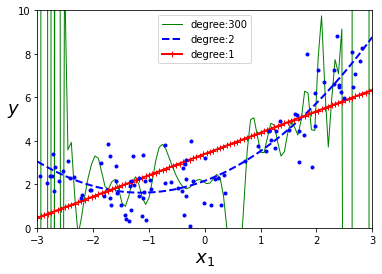

In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=f'degree:{str(degree)}', linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
#plt.legend(loc="upper left")
plt.legend()
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("high_degree_polynomials_plot")
plt.show()

还有一种方法是观察学习曲线：这个曲线绘制的是模型在训练集和验证集上，关于“训练集大小”的性能函数。要生成这个曲线，只需要在不同大小的训练子集上多次训练模型即可。下面这段代码，在给定训练集下定义了一个函数，绘制模型的学习曲线：

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

看看纯线性回归模型（一条直线）的学习曲线（如图4-15所示）：

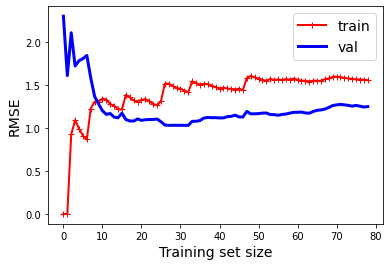

In [103]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y.ravel())

首先，看训练数据上的性能：当训练集中只包括一两个实例时，模型可以完美拟合，这是为什么曲线是从0开始的。但是，随着新的实例被添加进训练集中，模型不再能完美拟合训练数据了，因为数据有噪声，并且根本就不是线性的。所以训练集的误差一路上升，直到抵达一个高地，从这一点开始，添加新实例到训练集中不再使平均误差上升或下降。然后我们再来看看验证集的性能表现。当训练集实例非常少时，模型不能很好地泛化，这是为什么验证集误差的值一开始非常大，随着模型经历更多的训练数据，它开始学习，因此验证集误差慢慢下降。但是仅靠一条直线终归不能很好地为数据建模，所以误差也停留在了一个高值，跟另一条曲线十分接近。

这条学习曲线是典型的模型拟合不足。两条曲线均到达高地，非常接近，而且相当高。

> 如果模型对训练数据拟合不足，添加更多训练示例也于事无补。需要使用更复杂的模型或者找到更好的特征。

现在再来看看在同样的数据集上，一个10阶多项式模型的学习曲线（见图4-16）：

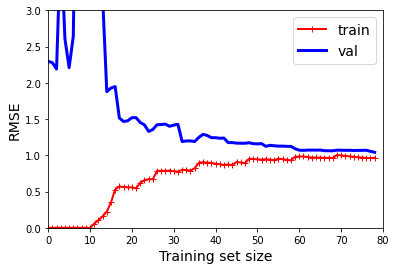

In [112]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
# save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

这条学习曲线看起来跟前一条差不多，但是有两个非常重大的区别：

* 训练数据的误差远低于线性回归模型。

* 两条曲线之间有一定差距。这意味着该模型在训练数据上的表现比验证集上要好很多，这正是`过度拟合`的标志。但是，如果使用更大的训练集，那么这两条曲线将会越来越近。

> 改进模型过度拟合的方法之一是提供更多的训练数据，直到验证误差接近训练误差。

### 偏差/方差权衡

在统计学和机器学习领域，一个重要的理论结果是，模型的泛化误差可以被表示为三个截然不同的误差之和：

* 偏差

这部分泛化误差的原因在于错误的假设，比如假设数据是线性的，而实际上是二次的。高偏差模型最有可能对训练数据拟合不足。 [1]

* 方差

这部分误差是由于模型对训练数据的微小变化过度敏感导致的。具有高自由度的模型（例如高阶多项式模型）很可能也有高方差，所以很容易对训练数据过度拟合。

* 不可避免的误差

这部分误差是因为数据本身的噪声所致。减少这部分误差的唯一方法就是清理数据（例如修复数据源，如损坏的传感器，或者是检测并移除异常值）。

增加模型的复杂度通常会显著提升模型的方差，减少偏差。反过来，降低模型的复杂度则会提升模型的偏差，降低方差。这就是为什么称其为权衡。

> [1] 不要将这里的偏差概念与线性模型中的偏置项概念弄混。

## 正则线性模型

如第1章和第2章所述，减少过度拟合的一个好办法就是对模型正则化（即约束它）：它拥有的自由度越低，就越不容易过度拟合数据。比如，将多项式模型正则化的简单方法就是降低多项式的阶数。

对线性模型来说，正则化通常通过约束模型的权重来实现。接下来使用`岭回归`（Ridge Regression）、`套索回归`（Lasso Regression）及`弹性网络`（Elastic Net）这三种不同的实现方法对权重进行约束。

### 岭回归

岭回归（也叫作吉洪诺夫正则化）是线性回归的正则化版：在成本函数中添加一个等于$\alpha \sum_{i=1}^n \theta_i^2$的正则项。这使得学习中的算法不仅需要拟合数据，同时还要让模型权重保持最小。

> 正则项只能在训练的时候添加到成本函数中，一旦训练完成，需要使用未经正则化的性能指标来评估模型性能。

> 训练阶段使用的成本函数与测试时使用的成本函数不同是非常常见的现象。除了正则化以外，还有一个导致这种不同的原因是，训练时的成本函数通常都可以使用优化过的衍生函数，而测试用的性能指标需要尽可能接近最终目标。举例来说，一个使用对数损失函数（log loss，后文即将讨论）作为成本函数来训练的分类器，最后评估时使用的指标却是精度/召回率。

超参数$\alpha$控制的是对模型进行正则化的程度。如果$\alpha=0$，则岭回归就是线性模型。如果$\alpha$非常大，那么所有的权重都将非常接近于零，结果是一条穿过数据平均值的水平线。公式4-8给出了岭回归模型的成本函数。 [1]

$$
J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^n \theta_i^2
$$

> 这里偏置项$\theta_0$没有正则化（求和从$i=1$开始，不是$i=0$）。如果将$w$定义为特征权重的向量（$\theta_1$到$\theta_n$），那么正则项即等于$\frac{1}{2} (||w||_2)^2$其中$||w||_2$为权重向量的$\ell_2$范数。 [2] 而对于梯度下降，只需要在MSE梯度向量（公式4-6）上添加$\alpha w$即可。

> 在执行岭回归之前，必须对数据进行缩放（例如使用StandardScaler），因为它对输入特征的大小非常敏感。大多数正则化模型都是如此。



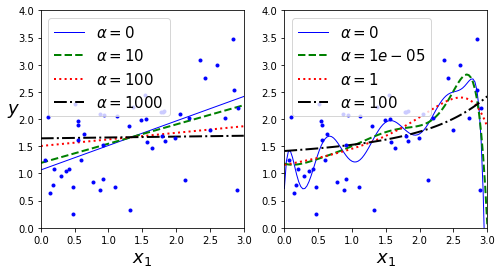

In [131]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:", "k-.")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100, 1000), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1, 100), random_state=42)

# save_fig("ridge_regression_plot")
plt.show()

上面显示了使用不同$\alpha$值对某个线性数据进行训练的几种岭回归模型。左边直接使用岭回归，导致预测是线性的。而右边，首先使用`PolynomialFeatures(degree=10)`对数据进行扩展，然后用`StandardScaler`进行缩放，最后再将岭回归模型用于结果特征：这就是岭正则化后的多项式回归。注意看$\alpha$是如何使预测更平坦的（也就是不那么极端，更为合理）；这降低了模型的方差，但是提升了偏差。

与线性回归一样，也可以在计算闭式方程或者执行梯度下降时，执行岭回归。利弊都一样。公式4-9显示的是闭式解（其中A是一个$n \times n$的单位矩阵 [3] ，除了左上单元格为0，其他与偏置项对应）。

$$
\hat \theta = (X^T \cdot X + \alpha A)^{-1}\cdot X^T \cdot y \tag{4-9}
$$

下面是如何使用Scikit-Learn执行闭式解的岭回归（使用的是公式4-9的一种变体，利用André-Louis Cholesky的矩阵因式分解法）：

In [132]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.73804889]])

使用随机梯度下降： [4]

In [133]:
sgd_reg = SGDRegressor(penalty="l2")

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.69474034])

超参数penalty设置的是使用正则项的类型。设为"l2"表示希望SGD在成本函数中添加一个正则项，等于权重向量的$\ell_2$范数的平方的一半，即岭回归。

### Lasso回归

线性回归的另一种正则化，叫作最小绝对收缩和选择算子回归（Least Absolute Shrinkage and Selection Operator Regression，简称Lasso回归，或`套索回归`）。与岭回归一样，它也是向成本函数增加一个正则项，但是它增加的是权重向量的$\ell_1$范数，而不是$\ell_2$ 范数的平方的一半（参见公式4-10）。

公式4-10：Lasso回归成本函数
$$
J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i| \tag{4-10}
$$

图4-18显示内容与图4-17相同，但是岭回归模型换成了Lasso回归模型，同时$\alpha$值较小。

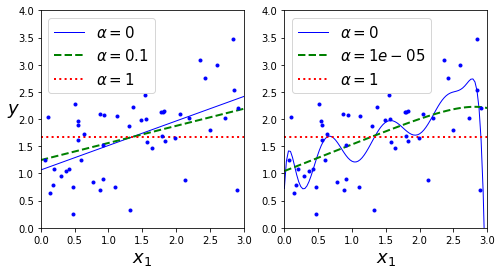

In [138]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-5, 1), tol=1, random_state=42)

# save_fig("lasso_regression_plot")
plt.show()

Lasso回归的一个重要特点是它倾向于完全消除掉最不重要特征的权重（也就是将它们设置为零）。例如，在图4-18的右图中的绿色虚线（$\alpha＝10^{-5}$）看起来像是二次的，快要接近于线性：因为所有高阶多项式的特征权重都等于零。换句话说，Lasso回归会自动执行特征选择并输出一个稀疏模型（即只有很少的特征有非零权重）。

In [140]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

# 岭回归的正则化函数
J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

# 1阶范数
N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
# 2阶范数
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


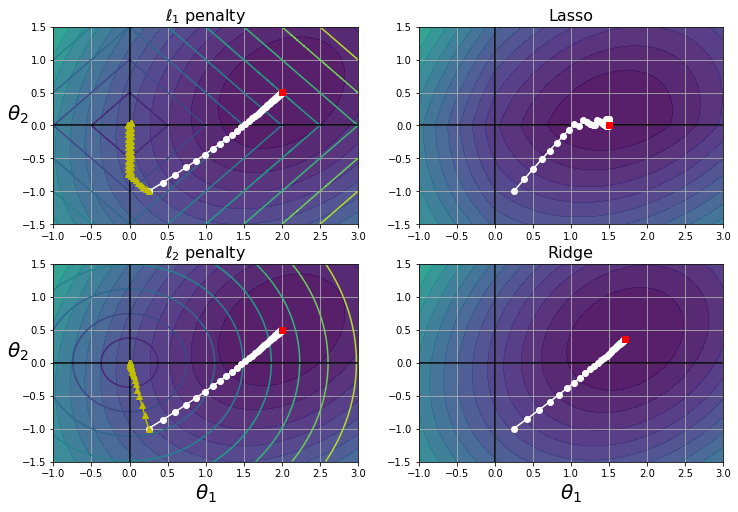

In [249]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)
    
    # 第一张不同范数的图
    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)
    
    # 第二张不同正则化的图
    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    # plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        plt.xlabel(r"$\theta_1$", fontsize=20)

# save_fig("lasso_vs_ridge_plot")
plt.show()

上图说明了情况为什么是这样。在左上图中，背景轮廓（椭圆）表示未正则化的$MSE$成本函数（$\alpha＝0$），白色圆点表示该成本函数下，批量梯度下降（BGD）的路径。前景轮廓（菱形）表示$\ell_1$ 惩罚函数，黄色三角形表示该惩罚函数下，批量梯度下降的路径（$\alpha \to \infty$）。注意看这个路线是怎么走的，首先到达$\theta_1 = 0$，然后一路沿轴滚动，直到$\theta_2 = 0$。在右上图中，背景轮廓表示同样的成本函数加上一个$\alpha = 0.5$的$\ell_1$ 惩罚函数。全局最小值位于$\theta_2 = 0$轴上。批量梯度下降先是到达了$\theta_2 = 0$，再沿轴滚动到全局最小值。底部的两张图与上图的含义相同，但是把$\ell 1$ 换成了$\ell_2$惩罚函数。可以看出，正则化后的最小值虽然比未正则化的最小值更接近于$\theta = 0$，但是权重并没有被完全消除。

> 在Lasso成本函数下，BGD最后的路线似乎在轴上不断上下反弹，这是因为当θ 2 ＝0时，斜率突变。你需要逐渐降低学习率来保证它向全局最小值收敛。

当时$\theta_i = 0(i = 1, 2, \dots, n)$，Lasso成本函数是不可微的，但是，当任意$\theta_i = 0$时，如果使用次梯度向量g [5] 作为替代，依旧可以让梯度下降正常运转。公式4-11所示的次梯度向量公式，可用于Lasso成本函数的梯度下降。

$$
g(\theta, J) = \nabla_\theta MSE(\theta) + \alpha 
\begin{pmatrix}
sign(\theta_1)  \\
sign(\theta_2)  \\
\vdots          \\
sign(\theta_n)  \\
\end{pmatrix}   \\
when \, sign(\theta_i) = \left \{
\begin{array}{c}
  -1 (\theta_i<0) \\
  0 (\theta_i=0)  \\
  +1(\theta_i>0)  \\
\end{array}
\right. 
\tag{4-11}
$$

下面是一个使用Scikit-Learn的Lasso类的小例子。还可以使用`SGDRegressor(penalty="l1")`。

In [250]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.71794142])

### 弹性网络

弹性网络是岭回归与Lasso回归之间的中间地带。其正则项就是岭回归和Lasso回归的正则项的混合，混合比例通过$r$来控制。当$r = 0$时，弹性网络即等同于岭回归，而当$r = 1$时，即相当于Lasso回归（见公式4-12）。

$$
J(\theta) = MSE(\theta) + r \alpha \sum_{i=1}^n |\theta_i| + \frac{1-r}{2} \alpha \sum_{i=1}^n \theta_i^2 \tag{4-12}
$$

那么，到底如何选用线性回归、岭回归、Lasso回归和弹性网络呢？通常来说，有正则化——哪怕是很小，总是比没有更可取一些。所以大多数情况下，应该避免使用纯线性回归。岭回归是个不错的默认选择，但是如果觉得**实际用到的特征只有少数几个**，那就应该更倾向于Lasso回归或是弹性网络，因为它们会将无用特征的权重降为零。

> 一般而言，弹性网络优于Lasso回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时，Lasso回归的表现可能非常不稳定。

下面是一个使用Scikit-Learn的ElasticNet的小例子（`l1_ratio`对应混合比例`r`）：

In [251]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic_net.fit(X, y)

elastic_net.predict([[1.5]])

array([1.72501526])

### 早期停止法

对于梯度下降这一类迭代学习的算法，还有一个与众不同的正则化方法，就是在验证误差达到最小值时停止训练，该方法叫作早期停止法。图4-20展现了一个用批量梯度下降训练的复杂模型（高阶多项式回归模型）。经过一轮一轮的训练，算法不断地学习，训练集上的预测误差（RMSE）自然不断下降，同样其在验证集上的预测误差也随之下降。但是，一段时间之后，验证误差停止下降反而开始回升。这说明模型开始过度拟合训练数据。通过早期停止法，一旦验证误差达到最小值就立刻停止训练。这是一个非常简单而有效的正则化技巧，所以Geoffrey Hinton称其为“美丽的免费午餐”。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:52: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


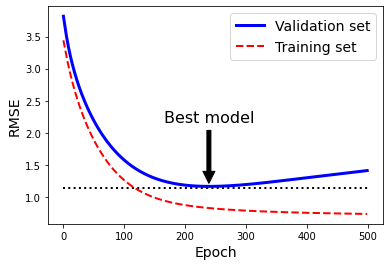

In [356]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
# save_fig("early_stopping_plot")
plt.show()

> 对随机梯度下降和小批量梯度下降来说，曲线没有这么平滑，所以很难知道是否已经达到最小值。一种解决方法是等验证误差超过最小值一段时间之后再停止（这时你可以确信模型不会变得更好了），然后将模型参数回滚到验证误差最小时的位置。

下面是早期停止法的基本实现：

In [357]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [358]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

> 注意，当`warm_start=True`时，调用`fit()`方法，会从停下的地方继续开始训练，而不会重新开始。

## 逻辑回归

正如第1章中提到过的，一些回归算法也可用于分类（反之亦然）。`逻辑回归`（Logistic回归，也称为罗吉思回归）被广泛用于估算一个实例属于某个特定类别的概率。（比如，这封电子邮件属于垃圾邮件的概率是多少？）如果预估概率超过50%，则模型预测该实例属于该类别（称为正类，标记为“1”），反之，则预测不是（也就是负类，标记为“0”）。这样它就成了一个二元分类器。

### 概率估算

所以它是怎么工作的呢？跟线性回归模型一样，逻辑回归模型也是计算输入特征的加权和（加上偏置项），但是不同于线性回归模型直接输出结果，它输出的是结果的数理逻辑（参见公式4-13）。

$$
\hat p = h \theta(x) = \sigma(\theta^T \cdot x) \tag{4-13}
$$

逻辑模型，是一个`sigmoid函数`（即S形），记作$\sigma (\cdot)$，它的输出为一个0到1之间的数字。定义如公式4-14和图4-21所示。

$$
\sigma (t) = \frac{1}{1+e^{-t}} \tag{4-14} \label{4-14}
$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


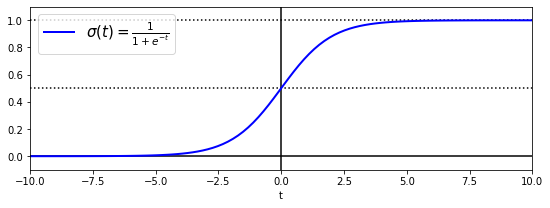

In [270]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-X1))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=15)
plt.axis([-10, 10, -0.1, 1.1])
# save_fig("logistic_function_plot")
plt.show()

一旦逻辑回归模型估算出实例$x$属于正类的概率$\hat p = h_\theta(x)$，就可以轻松做出预测$\hat y$ （见公式4-15）。

$$
\hat y = \left \{
\begin{array}{c}
0(\hat p < 0.5) \\
1(\hat p \ge 0.5)
\end{array}
\right. \tag{4-15} \label{4-15}
$$

> 当$t<0$时，$\sigma (t) <0.5$；当$t \ge 0$时，$\sigma(t) \ge 0.5$。所以如果$θ^T \cdot x$是正类，逻辑回归模型预测结果是1，如果是负类，则预测为0。

### 训练和成本函数

现在知道逻辑回归模型是如何估算概率并做出预测了。但是要怎么训练呢？训练的目的就是设置参数向量$\theta$，使模型对正类实例做出高概率估算（$y=1$），对负类实例做出低概率估算（$y=0$）。公式4-16所示为单个训练实例$x$的成本函数，正说明了这一点。

$$
c(\theta)= \left \{
\begin{array}{c}
-\log(\hat p ) & (y=1) \\
-\log(1 - \hat p) & (y=0)
\end{array}
\right. \tag{4-16} \label{4-16}
$$

这个成本函数是有道理的，因为当$t$接近于0时，$-\log(t)$会变得非常大，所以如果模型估算一个正类实例的概率接近于0，成本将会变得很高。同理估算出一个负类实例的概率接近1，成本也会变得非常高。那么反过来，当t接近于1的时候，$-\log(t)$接近于0，所以对一个负类实例估算出的概率接近于0，对一个正类实例估算出的概率接近于1，而成本则都接近于0，这正好是我们想要的。

整个训练集的成本函数即为所有训练实例的平均成本。它可以记成一个单独的表达式，如公式4-17所示，这个函数被称为`log损失函数`。

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^m \bigg [ y^{(i)}\log(\hat p^{(i)})+(1-y^{(i)})\log(1-\hat p^{(i)})\bigg] \tag{4-17} \label{4-17}
$$

但是坏消息是，这个函数没有已知的闭式方程（不存在一个标准方程的等价方程）来计算出最小化成本函数的θ值。而好消息是，这是个`凸函数`，所以通过梯度下降（或是其他任意优化算法）保证能够找出全局最小值（只要学习率不是太高，又能长时间等待）。公式4-18给出了成本函数关于第$j$个模型参数$\theta_j$ 的偏导数方程。

$$
\frac{\partial}{\partial\theta_j}J(\theta)=\frac{1}{m}\sum_{i=1}^m(\sigma(\theta^T)\cdot x^{(i)}-y^{(i)})x_j^{(i)} \tag{4-18} \label{4-18}
$$

公式4-18与公式4-5看起来非常相似：计算出每个实例的预测误差，并将其乘以第$j$个特征值，然后再对所有训练实例求平均值。一旦有了包含所有偏导数的梯度向量就可以使用梯度下降算法了。就是这样，现在知道如何训练逻辑模型了。对随机梯度下降，一次使用一个实例；对小批量梯度下降，一次使用一个小批量。

### 决策边界

这里用鸢尾植物数据集来说明逻辑回归。这是一个非常著名的数据集，共有150朵鸢尾花，分别来自三个不同品种：Setosa鸢尾花、Versicolor鸢尾花和Virginica鸢尾花，数据里包含花的萼片以及花瓣的长度和宽度（见图4-22）。



图4-22：三种不同品种的鸢尾花 [6]

试试仅基于花瓣宽度这一个特征，创建一个分类器来检测Virginica鸢尾花。首先加载数据：

In [271]:
from sklearn import datasets

iris = datasets.load_iris()

list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [281]:
print(type(iris))
print(iris['DESCR'])

<class 'sklearn.utils.Bunch'>
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== 

In [272]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

训练逻辑回归模型：

In [273]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

来看看对于花瓣宽度在0到3厘米之间的鸢尾花，模型估算出的概率（见图4-23）。

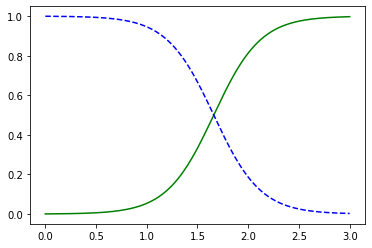

In [274]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")

plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

# + more Matplotlib code to make the image look pretty

In [302]:
X_new[y_proba[:, 1] >= 0.5][0]

array([1.66066066])

/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


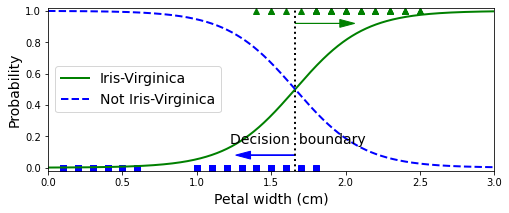

In [312]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
# save_fig("logistic_regression_plot")
plt.show()

In [314]:
decision_boundary

array([1.66066066])

Virginica鸢尾花（三角形所示）的花瓣宽度范围为1.4～2.5厘米，而其他两种鸢尾花（正方形所示）花瓣通常较窄，花瓣宽度范围为0.1～1.8厘米。注意，这里有一部分重叠。对花瓣宽度超过2cm的花，分类器可以很有信心地说它是一朵Virginica鸢尾花（对该类别输出一个高概率值），对花瓣宽度低于1cm以下的，也可以胸有成竹地说其不是（对“非Virginica鸢尾花”类别输出一个高概率值）。在这两个极端之间，分类器则不太有把握。但是，如果要求它预测出类别（使用`predict()`方法而不是`predict_proba()`方法），它将返回一个可能性最大的类别。也就是说，在大约1.6厘米处存在一个决策边界，这里“是”和“不是”的可能性都是50%，如果花瓣宽度大于1.6厘米，分类器就预测它是Virginica鸢尾花，否则就预测否：

In [313]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

下图还是同样的数据集，但是这次显示了两个特征：花瓣宽度和花瓣长度。经过训练，这个逻辑回归分类器就可以基于这两个特征来预测新花朵是否属于Virginica鸢尾花。虚线表示模型估算概率为50%的点，即模型的决策边界。注意这里是一个线性的边界。（注：它是使方程$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$的点x的集合，这个方程定义的是一条直线。）每条平行线都分别代表一个模型输出的特定概率，从左下的15%到右上的90%。根据这个模型，右上线之上的所有花朵，都有超过90%的概率属于Virginica鸢尾花。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


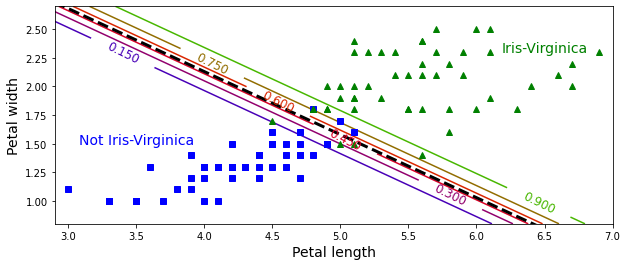

In [318]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X, y)

# 生成二维数组的方法
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
# save_fig("logistic_regression_contour_plot")
plt.show()

与其他线性模型一样，逻辑回归模型可以用$l_1$ 或$l_2$ 惩罚函数来正则化。Scikit-Learn默认添加的是$l_2$函数。

> 控制Scikit-Learn的`LogisticRegression`模型正则化程度的超参数不是alpha（其他线性模型使用alpha），而是它的逆反：C，C的值越高，模型正则化程度越高。

### Softmax回归

逻辑回归模型经过推广，可以直接支持多个类别，而不需要训练并组合多个二元分类器。这就是`Softmax`回归，或者叫`多元逻辑回归`。

原理很简单：对于一个给定的实例$x$，`Softmax`回归模型首先计算出每个类别$k$的分数$s_k (x)$，然后对这些分数应用softmax函数（也叫归一化指数），估算出每个类别的概率。应该很熟悉计算$s_ k(x)$分数的公式，因为它看起来就跟线性回归预测的方程一样。

$$
s_k(x)=\theta_k^T \cdot x \tag{4-19} \label{4-19}
$$

注意，每个类别都有自己特定的参数向量$\theta_k$ 。所有这些向量通常都作为行存储在参数矩阵$\Theta$中。

计算完实例x每个类别的分数后，就可以通过Softmax函数（公式4-20）来计算分数：计算出每个分数的指数，然后对它们进行归一化处理（除以所有指数的总和）即得到 ，也就是实例属于类别k的概率。

$$
\hat p_k = \sigma(s(x))_k = \frac{\exp(s_k(x))}{\sum_{j=1}^K \exp(s_j(x))} \tag{4-20} \label{4-20}
$$

* $K$是类别的数量

* $s(x)$是实例$x$每个类别的分数的向量

* $\sigma (s(x))_k$ 是给定的类别分数下，实例x属于类别k的概率

跟逻辑回归分类器一样，Softmax回归分类器将估算概率值最高的类别作为预测类别（也就是分数最高的类别），如公式4-21所示。

$$
\begin{array}{c}
    \hat y =& \argmax_k \sigma(s(x))_k  \\=& \argmax_k s_k(x) \\=& \argmax_k(\theta_k^T \cdot x)
\end{array}
 \tag{4-21} \label{4-21}
$$



* argmax运算符返回的是使函数最大化所对应的变量的值。在这个等式里，它返回的是使估算概率$(s(x))_k$ 最大的k的值。

> Softmax回归分类器一次只会预测一个类别（也就是说，它是`多类别`，但是不是`多输出`），所以它应该仅适用于`互斥`的类别之上，例如植物的不同种类。而不能用它来识别一张照片中的多个人。

既然已经知道了模型如何进行概率估算并做出预测，那再来看看怎么训练。训练目标是得到一个能对目标类别做出高概率估算的模型（也就是其他类别的概率相应要很低）。通过将公式4-22的成本函数（也叫作`交叉熵`）最小化来实现这个目标，因为当模型对目标类别做出较低概率的估算时，会受到惩罚。`交叉熵`经常被用于衡量一组估算出的类别概率跟目标类别的匹配程度。

$$
J(\Theta) = -\frac{1}{m} \sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} \log(\hat p_k^{(i)}) \tag{4-22} \label{4-22}
$$

* 如果第i个实例的目标类别为$k$，则$y_k^{(i)}$等于1，否则为0。

注意，当只有两个类别（K=2）时，该成本函数等价于逻辑回归的成本函数（log损失函数，参见公式4-17）。

### 交叉熵

交叉熵源于信息理论。假设想要有效传递每天的天气信息，选项（晴、下雨等）有8个，那么可以用3比特对每个选项进行编码，因为$2^3 =8$。但是，如果认为几乎每天都是晴天，那么，对“晴天”用1比特（0），其他七个类别用4比特（从1开始）进行编码，显然会更有效率一些。交叉熵衡量的是每次发送天气选项的平均比特数。如果对天气的假设是完美的，交叉熵将会等于天气本身的熵（也就是其本身固有的不可预测性）。但是如果假设是错误的（比如经常下雨），交叉熵将会变大，增加的这一部分称之为`KL散度`（Kullback-Leibler divergence，也叫作`相对熵`）。

两个概率分布p和q之间的交叉熵定义为$H(p,q) = -\sum_x p(x)\log q(x)$（至少在离散分布时可以这样定义）。

公式4-23给出了该成本函数关于$θ_k$的梯度向量：

$$
\nabla_{\theta_k}J(\Theta) = \frac{1}{m} \sum_{i=1}^m(\hat p_k^{(i)}-y_k^{(i)})x^{(i)} \tag{4-23} \label{4-23}
$$

现在可以计算出每个类别的梯度向量，然后使用梯度下降（或任意其他优化算法）找到最小化成本函数的参数矩阵$\Theta$。

使用Softmax回归将鸢尾花分为三类。当用两个以上的类别训练时，Scikit-Learn的`LogisticRegression`默认选择使用的是一对多的训练方式，不过将超参数`multi_class`设置为`"multinomial"`，可以将其切换成`Softmax回归`。还必须指定一个支持Softmax回归的求解器，比如`"lbfgs"`求解器。默认使用$\ell_2$正则化，可以通过超参数C进行控制。

In [344]:
X = iris["data"][:,(2,3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

所以当下次碰到一朵鸢尾花，花瓣长5厘米宽2厘米，就可以让模型告诉你它的种类，它会回答说：94.2%的概率是Virginica鸢尾花（第2类）或者5.8%的概率为Versicolor鸢尾花：

In [345]:
softmax_reg.predict([[5, 2]])

array([2])

In [346]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

下图展现了由不同背景色表示的决策边界。注意，任何两个类别之间的决策边界都是线性的。图中的折线表示属于Versicolor鸢尾花的概率（例如，标记为0.45的线代表45%的概率边界）。注意一点，该模型预测出的类别，其估算概率有可能低于50%，比如，在所有决策边界相交的地方，所有类别的估算概率都为33%。

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


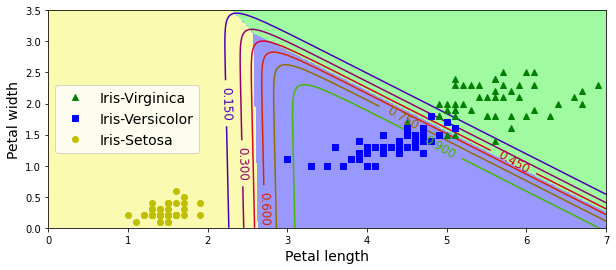

In [347]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
#save_fig("softmax_regression_contour_plot")
plt.show()

## 练习

1.如果你的训练集有超过百万个特征，你会选择什么线性回归训练算法？

梯度下降（随机或小批量）

2.如果你的训练集里特征的数值大小迥异，什么算法可能会受到影响？受影响程度如何？你应该怎么做？

需要在训练模型之前先对数据进行缩放（数据标准化）。使用标准方程法，不经过特征缩放也能正常工作。

3.训练逻辑回归模型时，梯度下降是否会困于局部最小值？

逻辑回归不会困于局部最小值，因为其成本函数是凸函数。

4.假设运行时间足够长，所有的梯度下降算法是不是最终会产生相同的模型？

不一定，可能是局部最小值，甚至无法收敛。

5.假设你使用的是批量梯度下降，并且每一轮训练都绘制出其验证误差，如果发现验证误差持续上升，可能发生了什么？你如何解决这个问题？

可能性之一是学习率太高，算法开始发散。如果训练误差也开始上升，需要降低学习率了。但是，如果训练误差没有上升，那么模型很可能过度拟合训练集，应该立刻停止训练。

6.当验证误差开始上升时，立刻停止小批量梯度下降算法训练是否为一个好主意？

无论是随机梯度下降还是小批量梯度下降，由于随机性，使得它们都不能保证在每一次的训练迭代中都取得进展。所以，如果在验证误差刚开始上升时就停止训练，很有可能会在达到最优之前过早停止训练。更好的方法是定时保存模型，当较长一段时间都没有改善时（意味着可能不会再超过最好的记录了），可以恢复到保存的最优模型。

7.哪种梯度下降算法（所有我们讨论过的）能最快到达最优解的附近？哪种会收敛？如何使其他算法同样收敛？

随机梯度下降可能最快达到最优解附近。逻辑回归会收敛。只有批量梯度下降才会经过足够长时间的训练后真正收敛。对于随机梯度下降和小批量梯度下降来说，除非逐渐调低学习率，否则将一直围绕最小值上上下下。

8.假设你使用的是多项式回归，绘制出学习曲线，你发现训练误差和验证误差之间存在很大的差距。发生了什么？哪三种方法可以解决这个问题？

大概率是过拟合导致。增加正则化。或者对多项式降阶：自由度越低的模型，过度拟合的可能性越低。另一个方法是对模型进行正则化——例如，在成本函数中增加$l_2$（岭回归）或$l_1$（Lasso回归）惩罚，同样可以降低模型的自由度。最后，可以尝试扩大训练集。

9.假设你使用的是岭回归，你注意到训练误差和验证误差几乎相等，并且非常高。你认为模型是高方差还是高偏差？你应该提高还是降低正则化超参数？

欠拟合，高偏差。降低正则化超参数。

10.你为何要使用：

* 岭回归而不是线性回归？

产生过拟合

* Lasso回归而不是岭回归？

Lasso回归使用$l_1$惩罚函数，往往倾向于将不重要的特征权重降至零。这将生成一个除了最重要的权重之外，其他所有权重都为零的稀疏模型。这是自动执行特征选择的一种方法，如果你觉得只有少数几个特征是真正重要的，这不失为一个非常好的选择，但是当您不确定的时候，应该更青睐岭回归模型。

* 弹性网络而不是Lasso回归？

弹性网络优于Lasso回归，因为当特征数量超过训练实例数量，又或者是几个特征强相关时，Lasso回归的表现可能非常不稳定。

弹性网络比Lasso更受欢迎，因为某些情况下Lasso可能产生异常表现（例如当多个特征强相关，或者特征数量比训练实例多时）。并且，弹性网络会添加一个额外的超参数来对模型进行调整。如果想使用Lasso，只需要将弹性网络的l1_ratio设置为接近1即可。

11.如果你想将图片分类为户外/室内以及白天/黑夜。你应该实现两个逻辑回归分类器还是一个Softmax回归分类器？

交叉分类应该是两个逻辑回归分类器

12.用Softmax回归进行批量梯度下降训练，并实施早期停止法（不使用Scikit-Learn）。

In [375]:
# 取训练集
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
# 增加截距：bias=1
X_with_bias = np.c_[np.ones([len(X), 1]), X]

# 拆分训练集、测试集、验证集
np.random.seed(55)
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

# 20%的测试集，20%的验证集，剩余训练集
test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

# 随机打乱
rnd_indices = np.random.permutation(total_size)

# 生成数据集
X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

In [377]:
def to_one_hot(y):
    """
    生成OneHot函数
    """
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [378]:
# 输出改成OneHot矩阵
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [380]:
# 定义Softmax函数
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [381]:
# 输入与输出变量
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [387]:
# 梯度下降法计算训练集的损失函数
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 2.079658549603061
500 0.7344642512657177
1000 0.6161368234759331
1500 0.543876771650861
2000 0.4948288227774553
2500 0.4588305162703621
3000 0.4308957052378603
3500 0.4083279920271984
4000 0.38954397632285254
4500 0.37354921328198665
5000 0.3596842279816438


In [388]:
Theta

array([[ 3.57526503, -0.22424323, -2.25572227],
       [-0.17527348,  0.86068162,  0.48232424],
       [-1.15753235,  0.24323729,  2.72928186]])

In [389]:
# 验证集测试准确率
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.8333333333333334

In [404]:
# 加上正则化参数（岭回归）
eta = 0.1
n_iterations = 50001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 5000 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.977789668683732
5000 0.48961750966593565
10000 0.48960491225816827
15000 0.48960490853394434
20000 0.4896049085328912
25000 0.48960490853289196
30000 0.48960490853289196
35000 0.48960490853289196
40000 0.48960490853289196
45000 0.48960490853289196
50000 0.48960490853289196


In [403]:
# 验证集测试准确率，增加了正则化系数的准确率提高了
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9

In [405]:
# 早期停止法
eta = 0.1 
n_iterations = 150001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 5000 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 3.706369672074034
5000 0.522413638822862
10000 0.5223246445296258
15000 0.5223233120614474
20000 0.5223232890615799
25000 0.522323288663534
28769 0.5223232886568527
28770 0.5223232886568527 early stopping!


In [406]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


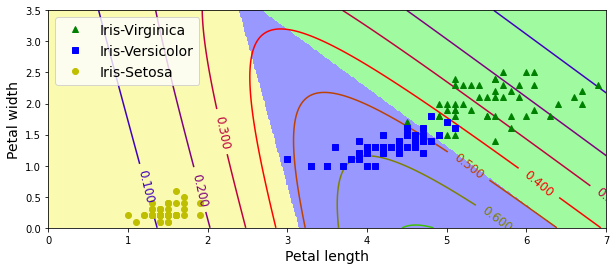

In [407]:
# 画决策边界
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()